In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib as plt
import requests
from urllib.parse import quote
import json
import pyproj
import os
os.chdir("D:/Projects/crime-prediction")

import common.census_tract as tract


In [7]:
census_tracts_path='data/census_tracts.geojson'
water_area_path ='data/water_area/water_area.geojson'

In [8]:
def parse_water_area():
   gdf = gpd.read_file(water_area_path)
   gdf = gdf.to_crs("EPSG:4326")
   return gdf 

In [9]:
water_area_gdf = parse_water_area()

In [10]:
def parse_census_tracts_data():
    gdf = gpd.read_file(census_tracts_path).rename(columns={'NAMELSAD': 'Tract Name'})
    
    #filter census tracts in King County
    gdf = gdf[gdf['COUNTYFP'] == "033"]
    
    gdf = gdf[['Tract Name', 'geometry']]
    gdf['Is Group'] = False
    gdf = gdf.overlay(water_area_gdf, how='difference')
    group_gdf = gdf.copy()
    group_gdf['Tract Name'] =  gdf.apply(lambda row: tract.formatTractGroupName(row["Tract Name"]) , axis=1)
    group_gdf = group_gdf.dissolve(by='Tract Name').reset_index()
    group_gdf['Is Group'] = True
    gdf = pd.concat([gdf, group_gdf]).drop_duplicates(subset=["Tract Name"]).reset_index(drop=True)
    return gdf

In [11]:
tracts_gdf=parse_census_tracts_data()
tracts_gdf.to_file('data/preprocessed/census_tracts_data.geojson', driver="GeoJSON")

<Axes: >

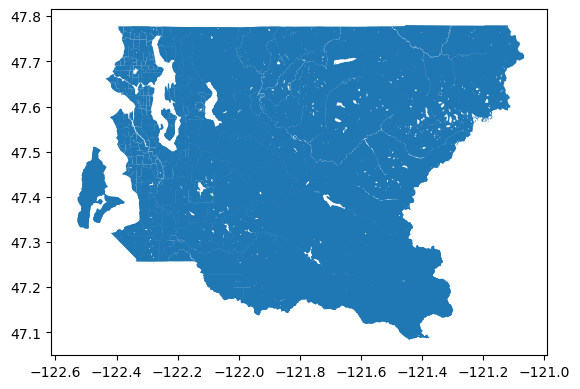

In [12]:
tracts_gdf.plot()